# Noise Filtering in Images

Real-world images often suffer from different types of noise.  
Blurring (smoothing) techniques can help to remove noise while trying to preserve important details like edges.

We will look at three common noise types:
1. Salt & Pepper Noise
2. Gaussian Noise
3. Speckle Noise

For each, we will generate noisy images and apply the most effective filter.

✅ **Key Rule:**  
- **Bigger kernel size = stronger denoising effect.**  
- Some filters also depend on **sigma** (Gaussian) or the type of noise being targeted.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to show two images side by side
def show_compare(title1, img1, title2, img2):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis("off")
    plt.show()

# Load base image
image = cv2.imread("assets/Image.jpeg")


## 🔹 1. Salt & Pepper Noise + Median Filter

**Salt & Pepper Noise**:  
- Appears as random **white and black pixels** scattered in the image.  
- Common in transmission errors and low-quality image sensors.  
- Works by replacing each pixel with the **median** of surrounding pixels.  
- Very effective at removing salt-and-pepper noise.  
- **To increase effect:**  
  - Increase the **kernel size** (must be odd: 3, 5, 7...).  
  - Larger kernel sizes remove more noise but may also blur edges.

**Best Filter**:  
- **Median Blur**: replaces each pixel with the median of surrounding pixels.  
- Works well because the median ignores extreme black/white pixel outliers.

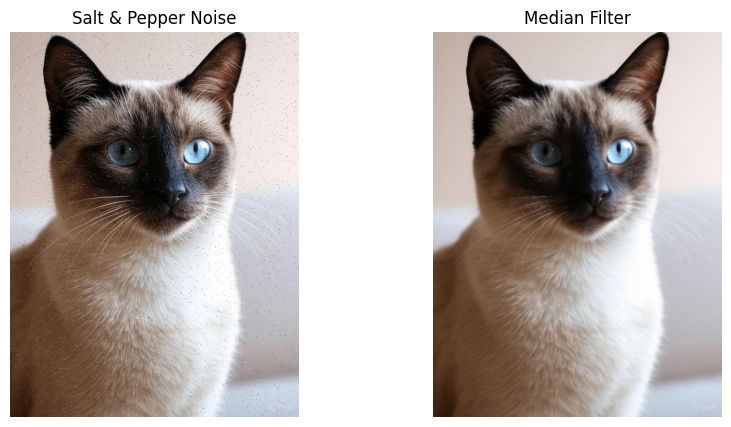

In [4]:
# Add Salt & Pepper noise
noisy_sp = image.copy()
row, col, _ = noisy_sp.shape
num_noise = 5000
for i in range(num_noise):
    y = np.random.randint(0, row)
    x = np.random.randint(0, col)
    noisy_sp[y, x] = [0,0,0] if np.random.randint(2) == 0 else [255,255,255]

# Apply Median Blur
denoised_sp = cv2.medianBlur(noisy_sp, 5)

# Compare
show_compare("Salt & Pepper Noise", noisy_sp, "Median Filter", denoised_sp)


## 🔹 2. Gaussian Noise + Gaussian Filter

**Gaussian Noise**  
- Appears as **grainy variations** across the image.  
- Common in low light conditions and sensor heating.  
- Uses a Gaussian kernel to smooth the image.  
- Good for reducing Gaussian noise and softening details.  
- **To increase effect:**  
  - Increase the **kernel size** (e.g., from 3x3 to 7x7).  
  - Increase the **sigma (standard deviation)** value for stronger smoothing. 

**Best Filter → Gaussian Blur**  
- Smooths out pixel intensity variations using a Gaussian kernel.  
- Produces natural-looking denoising results.

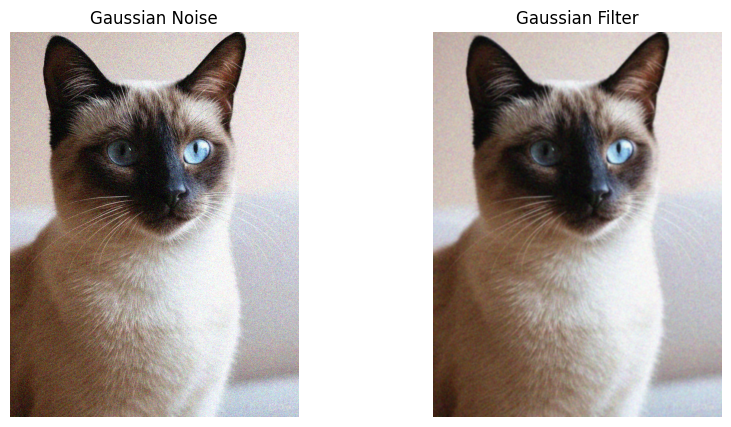

In [5]:
# Add Gaussian noise
gaussian_noise = np.random.normal(0, 25, image.shape).astype(np.int16)
noisy_gaussian = image.astype(np.int16) + gaussian_noise
noisy_gaussian = np.clip(noisy_gaussian, 0, 255).astype(np.uint8)

# Apply Gaussian Blur
denoised_gaussian = cv2.GaussianBlur(noisy_gaussian, (7,7), 0)

# Compare
show_compare("Gaussian Noise", noisy_gaussian, "Gaussian Filter", denoised_gaussian)


## 🔹 3. Speckle Noise + Bilateral Filter

**Speckle Noise**  
- Appears as **random multiplicative spots** on the image.  
- Common in radar, sonar, and ultrasound images.  
- Commonly reduced using filters such as **median** or **Gaussian blur**.  
- Works by averaging or smoothing random multiplicative noise.  
- **To increase effect:**  
  - Increase the **kernel size** in the chosen filter (median or Gaussian).  
  - Larger kernels produce stronger noise suppression.

**Best Filter → Bilateral Filter**  
- Reduces noise while **preserving edges**.  
- Unlike Gaussian/Median blur, it maintains sharp boundaries. 

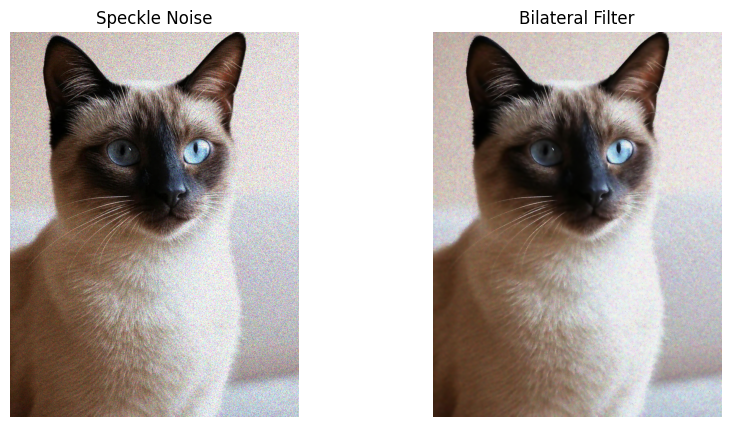

In [6]:
# Add Speckle noise (multiplicative)
speckle = np.random.randn(*image.shape) * 0.2  # noise strength
noisy_speckle = image + image * speckle
noisy_speckle = np.clip(noisy_speckle, 0, 255).astype(np.uint8)

# Apply Bilateral Filter
denoised_speckle = cv2.bilateralFilter(noisy_speckle, 9, 75, 75)

# Compare
show_compare("Speckle Noise", noisy_speckle, "Bilateral Filter", denoised_speckle)


## 🔹 3. Poison Noise + Filterred (Gaussian)
- Poisson noise (also called **shot noise**) occurs in images due to random variations in photon detection.  
- It is more common in low-light or scientific imaging.  
- To reduce Poisson noise, smoothing filters such as **Gaussian Blur** or **Median Filtering** are typically used.  

**To increase filtering effect:**  
- Increase the **kernel size** in the Gaussian or Median filter.  
- Increase the **sigma** value in Gaussian blur for stronger denoising.  


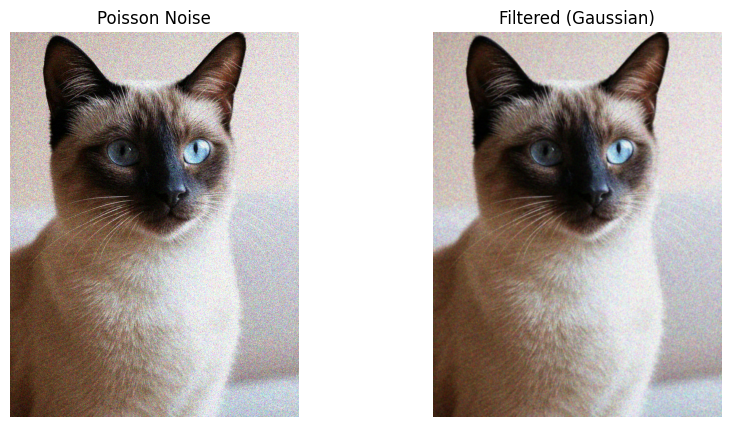

In [11]:
# Normalize RGB image to [0,1]
image_norm = image / 255.0  

# Add Poisson noise channel-wise
poisson_noise = np.random.poisson(image_norm * 30) / 30.0
poisson_noise = np.clip(poisson_noise, 0, 1)

# Convert back to uint8
poisson_noisy = (poisson_noise * 255).astype(np.uint8)

# Apply Gaussian filter to reduce Poisson noise
poisson_filtered = cv2.GaussianBlur(poisson_noisy, (5, 5), 1)

# Compare noisy vs filtered
show_compare("Poisson Noise", poisson_noisy, "Filtered (Gaussian)", poisson_filtered)

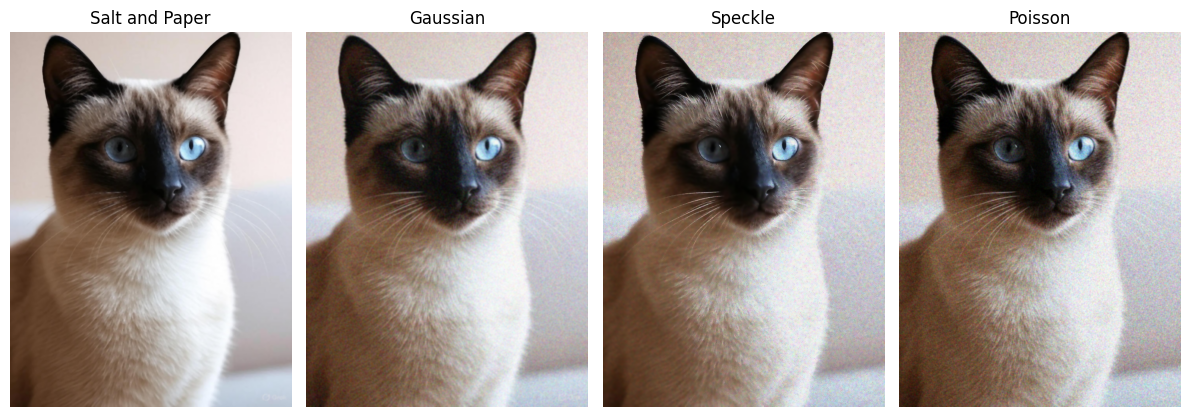

In [15]:
plt.figure(figsize=(12,8))

titles = ["Salt and Paper", "Gaussian", "Speckle", "Poisson"]
images = [denoised_sp, denoised_gaussian, denoised_speckle, poisson_filtered]

for i in range(4):
    plt.subplot(1,4,i+1)
    img = images[i]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


# 📌 Summary

- **Salt & Pepper Noise → Median Blur** is most effective.  
- **Gaussian Noise → Gaussian Blur** smooths grainy variations.  
- **Speckle Noise → Bilateral Filter** denoises while preserving edges.  

The choice of filter depends on the **type of noise** present in the image.